In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import astropy.units as u
import astropy.constants as const
from astropy.coordinates import Distance
import numpy as np

### 2.3

In [2]:
dist = Distance(value=470*u.lightyear)
dist.distmod

<Quantity 5.79335991 mag>

In [3]:
mv = 2.8 * u.mag
Mv = mv - dist.distmod
Mv

<Quantity -2.99335991 mag>

In [4]:
Mbol = Mv - 3.16*u.mag
Mbol

<Quantity -6.15335991 mag>

In [5]:
L = 10**((Mbol.value - 4.74)/-2.5) * u.solLum
L

<Quantity 22769.00043849 solLum>

In [6]:
Teff = 3e4 * u.K
R = np.sqrt(L/(4*np.pi*const.sigma_sb * Teff**4)).to(u.solRad)
R

<Quantity 5.58576832 solRad>

In [7]:
M = (L.value / 1.5)**(1/3.5) * u.solMass
M

<Quantity 15.65465966 solMass>

In [8]:
g = const.G * M / R**2
g.cgs

<Quantity 13757.68689006 cm / s2>

In [9]:
np.log10(g.cgs.value)

4.138545421157457

In [10]:
vesc = np.sqrt(2*const.G*M/R)
vesc.cgs

<Quantity 1.03404674e+08 cm / s>

In [11]:
rho = M/(4/3 * np.pi * R**3)
rho.cgs

<Quantity 0.12663696 g / cm3>

In [13]:
g_sol = const.G * u.solMass / (u.solRad**2)
g.cgs / g_sol.cgs

<Quantity 0.50173892>

In [14]:
vesc_sol = np.sqrt(2*const.G*u.solMass/u.solRad)
vesc.cgs / vesc_sol.cgs

<Quantity 1.67409599>

In [15]:
rho_sol = u.solMass/(4/3 * np.pi * u.solRad**3)
rho.cgs / rho_sol.cgs

<Quantity 0.08982451>

### 4.3

In [43]:
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.2)

In [44]:
df = pd.read_csv('http://www.ap.smu.ca/~guenther/evolution/ssmyz47_0200.txt',
                 delim_whitespace=True, skiprows=24,
                 names=['SHELL','Radius Frac','Mass Frac',
                        'Radius','Mass','Luminosity',
                        'Temperature [K]','Density [g/cm3]'])[::5]
                 #names=['R','M','L','logT [K]','logP []','logRho','mu','dTdR','dTdR_ad','equil'])[::5]

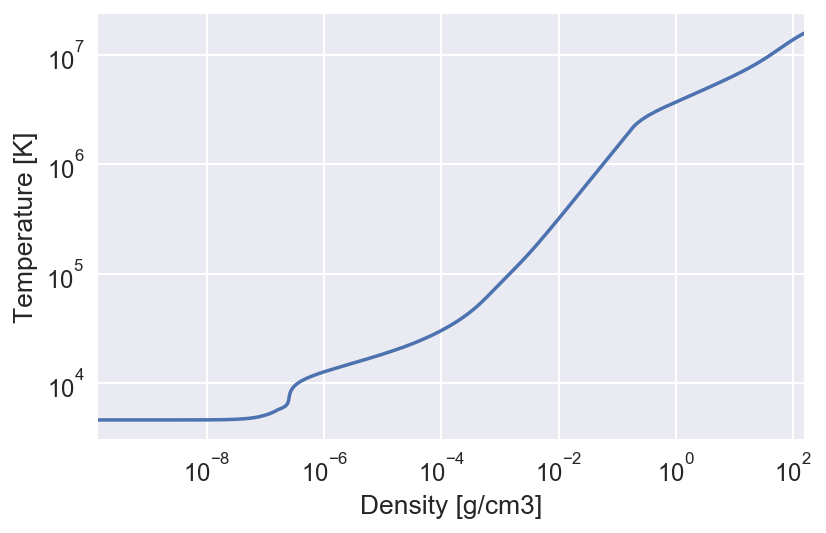

In [50]:
ax = df.plot('Density [g/cm3]','Temperature [K]')
ax.set_xscale('log')
ax.set_yscale('log')
ax.invert_xaxis()
ax.legend_.remove()
ax.set_ylabel('Temperature [K]')
sns.mpl.pyplot.tight_layout()
sns.mpl.pyplot.savefig('HW1/temp_density.jpg', dpi=144)

### 5.2

In [51]:
N = (u.solRad / u.cm)**2
N.decompose()

Unit(dimensionless with a scale of 4.8399849e+21)

In [63]:
path = N.decompose() * u.cm
(path / const.c).decompose().to(u.year)

<Quantity 5115.86807597 yr>

### 7.2

In [72]:
Lstar = 10**2.37* u.solLum
Mc = 1 * u.solMass
E = 0.007 * Mc * const.c**2
(E/Lstar).cgs

<Quantity 1.39408015e+16 s>

In [73]:
(E/Lstar).to(u.year)

<Quantity 4.41757341e+08 yr>

In [74]:
np.log10((E/Lstar).to(u.year).value)

8.645183775603543

In [75]:
Lstar = 10**4.61* u.solLum
Mc = 10 * u.solMass
E = 0.007 * Mc * const.c**2
(E/Lstar).cgs

<Quantity 8.02209393e+14 s>

In [76]:
(E/Lstar).to(u.year)

<Quantity 25420481.68459756 yr>

In [77]:
np.log10((E/Lstar).to(u.year).value)

7.405183775603542

In [83]:
'{:.3e}'.format(10**8.18), '{:.3e}'.format(10**6.89)

('1.514e+08', '7.762e+06')